# Airline Delay Causes Data Exploration
## by Sarah Elkhouly

## Preliminary Wrangling

The data comes originally from RITA where it is described in detail, it contains data about airlines ,flights ,timing..etc
with causes of delays of flights with more information about flights delays.
there is 175915 of Summary information entity on the number of on-time, delayed and diverted flights every month, In the dataset with 21 features.


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [44]:
delays = pd.read_csv('Airline_delay_causes.csv')


In [45]:
print(delays.shape)
pd.set_option('display.max_columns', None)
delays.tail(10)

(175915, 22)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
175905,2019,1,MQ,Envoy Air,PIT,"Pittsburgh, PA: Pittsburgh International",261.0,82.0,11.59,3.76,26.62,0.00,40.03,12.0,0.0,4068.0,494.0,119.0,907.0,0.0,2548.0,NaN
175906,2019,1,MQ,Envoy Air,PNS,"Pensacola, FL: Pensacola International",125.0,21.0,4.67,0.57,9.17,0.00,6.60,0.0,0.0,819.0,216.0,13.0,237.0,0.0,353.0,NaN
175907,2019,1,MQ,Envoy Air,PVD,"Providence, RI: Theodore Francis Green State",49.0,17.0,1.00,1.83,11.47,0.00,2.70,7.0,0.0,712.0,86.0,61.0,433.0,0.0,132.0,NaN
175908,2019,1,MQ,Envoy Air,PWM,"Portland, ME: Portland International Jetport",50.0,18.0,6.38,0.38,3.24,0.00,8.00,2.0,0.0,902.0,332.0,31.0,69.0,0.0,470.0,NaN
175909,2019,1,MQ,Envoy Air,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",252.0,78.0,14.11,0.00,26.25,0.13,37.50,6.0,0.0,4495.0,755.0,0.0,990.0,10.0,2740.0,NaN
175910,2019,1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,17.97,0.00,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0,NaN
175911,2019,1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,2.46,0.00,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0,NaN
175912,2019,1,MQ,Envoy Air,ROC,"Rochester, NY: Greater Rochester International",106.0,26.0,4.67,2.26,11.81,0.00,7.26,17.0,0.0,1259.0,313.0,99.0,484.0,0.0,363.0,NaN
175913,2019,1,MQ,Envoy Air,RST,"Rochester, MN: Rochester International",116.0,35.0,6.83,6.92,11.50,0.00,9.75,22.0,0.0,2307.0,474.0,633.0,523.0,0.0,677.0,NaN
175914,2019,1,MQ,Envoy Air,SAT,"San Antonio, TX: San Antonio International",26.0,4.0,1.16,0.64,1.92,0.00,0.29,5.0,0.0,120.0,50.0,14.0,41.0,0.0,15.0,NaN


In [46]:
delays.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [47]:
delays.columns = [x.strip() for x in delays.columns]

In [48]:
del delays['Unnamed: 21']

In [49]:
delays.groupby('carrier_name')['carrier'].value_counts()

carrier_name                  carrier
AirTran Airways Corporation   FL          3084
Alaska Airlines Inc.          AS          8022
Allegiant Air                 G4          4287
American Airlines Inc.        AA         11658
American Eagle Airlines Inc.  MQ          6707
Atlantic Southeast Airlines   EV          2792
Comair Inc.                   OH           918
Continental Air Lines Inc.    CO          1348
Delta Air Lines Inc.          DL         17734
Endeavor Air Inc.             9E          4294
Envoy Air                     MQ          7473
ExpressJet Airlines Inc.      EV         13159
                              XE          2702
ExpressJet Airlines LLC       EV          1436
Frontier Airlines Inc.        F9          8372
Hawaiian Airlines Inc.        HA          2163
JetBlue Airways               B6          7643
Mesa Airlines Inc.            YV          7590
PSA Airlines Inc.             OH          3290
Pinnacle Airlines Inc.        9E          2305
Republic Airline      

In [50]:
delays.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,175915.000000,175915.000000,175663.000000,175460.000000,175663.000000,175663.00000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000,175663.000000
mean,2015.207435,6.493619,382.873161,68.623931,19.780737,2.12966,21.371927,0.134271,25.128091,7.412329,0.892920,4114.488282,1283.626364,194.623552,988.708419,5.755304,1641.770640
std,3.320829,3.458979,1024.439675,181.300267,44.540625,6.69274,67.061824,0.584580,74.311180,42.637159,3.829943,11898.307656,3486.135381,707.014247,3663.736214,31.531574,4962.144994
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,56.000000,7.000000,2.500000,0.00000,1.420000,0.000000,1.700000,0.000000,0.000000,371.000000,122.000000,0.000000,48.000000,0.000000,84.000000
50%,2015.000000,6.000000,115.000000,20.000000,7.000000,0.37000,4.730000,0.000000,5.850000,1.000000,0.000000,1081.000000,393.000000,17.000000,173.000000,0.000000,361.000000
75%,2018.000000,9.000000,273.000000,51.000000,17.810000,1.79000,13.430000,0.000000,16.760000,4.000000,1.000000,2946.000000,1076.000000,136.000000,529.000000,0.000000,1115.000000
max,2020.000000,12.000000,21977.000000,5268.000000,1242.160000,295.28000,2401.790000,26.070000,1849.000000,4951.000000,256.000000,429194.000000,196944.000000,31960.000000,137443.000000,3194.000000,148181.000000


In [51]:
delays.security_ct.max()

26.07

In [52]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175915 entries, 0 to 175914
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 175915 non-null  int64  
 1   month                175915 non-null  int64  
 2   carrier              175915 non-null  object 
 3   carrier_name         175915 non-null  object 
 4   airport              175915 non-null  object 
 5   airport_name         175915 non-null  object 
 6   arr_flights          175663 non-null  float64
 7   arr_del15            175460 non-null  float64
 8   carrier_ct           175663 non-null  float64
 9   weather_ct           175663 non-null  float64
 10  nas_ct               175663 non-null  float64
 11  security_ct          175663 non-null  float64
 12  late_aircraft_ct     175663 non-null  float64
 13  arr_cancelled        175663 non-null  float64
 14  arr_diverted         175663 non-null  float64
 15  arr_delay        

### What is the structure of your dataset?

there is 175915 of Summary information entity on the number of on-time, delayed and diverted flights every month, In the dataset with 22 features as follows: 
* year                   
* month                 
* carrier              
* carrier_name          
* airport               
* airport_name          
* arr_flights          
* arr_del15           
* carrier_ct           
* weather_ct          
* nas_ct               
* security_ct          
* late_aircraft_ct     
* arr_cancelled        
* arr_diverted         
* arr_delay           
* carrier_delay       
* weather_delay        
* nas_delay            
* security_delay       
* Unnamed       


most of the variables are numeric (ints, floats)

### What is/are the main feature(s) of interest in your dataset?

I want to know the most relaible features with flights delays and if there is any features that surprisingly effect the airlines flights delays and how every airline performance changed over time.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the investigation will be supported by the type or cause of flights delays and number of delayed flights.

## Univariate Exploration

Firstly, I will look at the distribution of some features in order to explore for interest of every company.

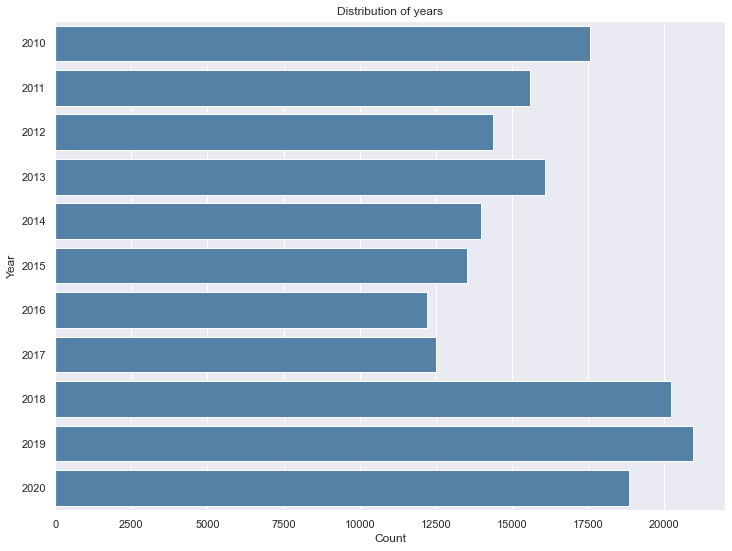

In [53]:
#visulaization of distibution for every year
sb.set(rc={'figure.figsize':(12,9)})
sb.countplot(y='year', color='steelblue', data=delays);
plt.title('Distribution of years')
plt.xlabel('Count')
plt.ylabel('Year');

<b> Obviously, The highest quantity of information we have of flights occured in the years of 2019 and 2018, The least number is in the year of  2016 and 2017. 

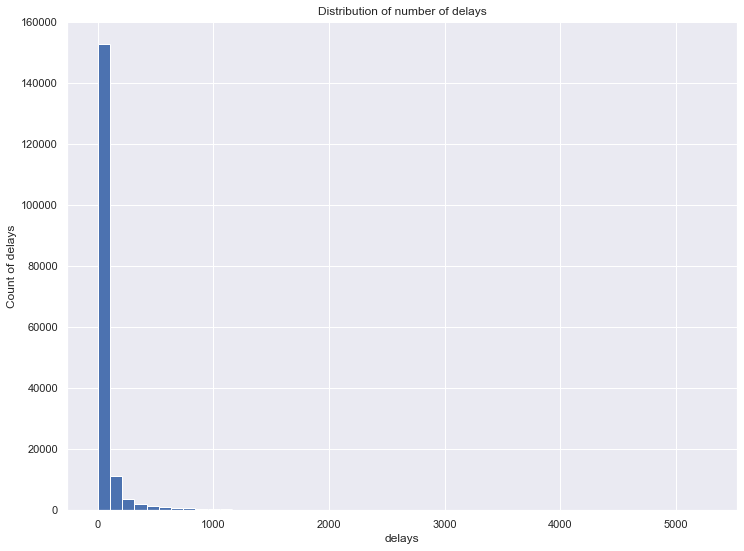

In [54]:
#a histogram visulaizing the frequency of number of delays 
plt.hist(data = delays, x = 'arr_del15', bins = 50);
plt.title('Distribution of number of delays')
plt.xlabel('delays')
plt.ylabel('Count of delays');

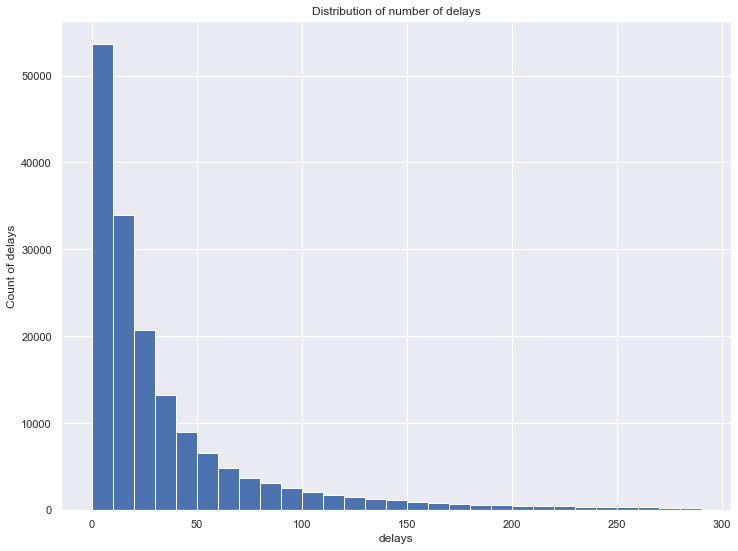

In [55]:
# exclude the top 5% to see the distribution of the bulk of the data
bins=np.arange(0,delays.arr_del15.quantile(0.95)+10,10)
#a histogram visulaizing the frequency of number of delays 
plt.hist(data = delays, x = 'arr_del15', bins = bins);
plt.title('Distribution of number of delays')
plt.xlabel('delays')
plt.ylabel('Count of delays');

<b> We can conclude that the distribution of delayed flights falls between zero flights and eight hundred flights.

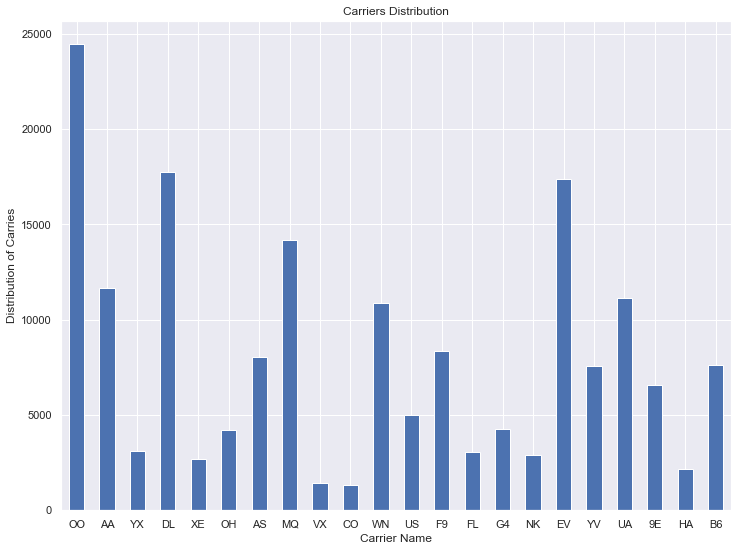

In [56]:
#visulization of frequency of every Airline carrier abbreviation.
Carrier = delays['carrier'].unique()
carrier_count = delays['carrier'].value_counts(sort=False)
carrier_count.plot.bar()
plt.xticks(rotation=360)
plt.title('Carriers Distribution')
plt.xlabel('Carrier Name')
plt.ylabel('Distribution of Carries');

<b> The carrier abbreviation that have been the most frequent is (OO) and carrier abbreviation that have been the least frequent are (VX and CO).

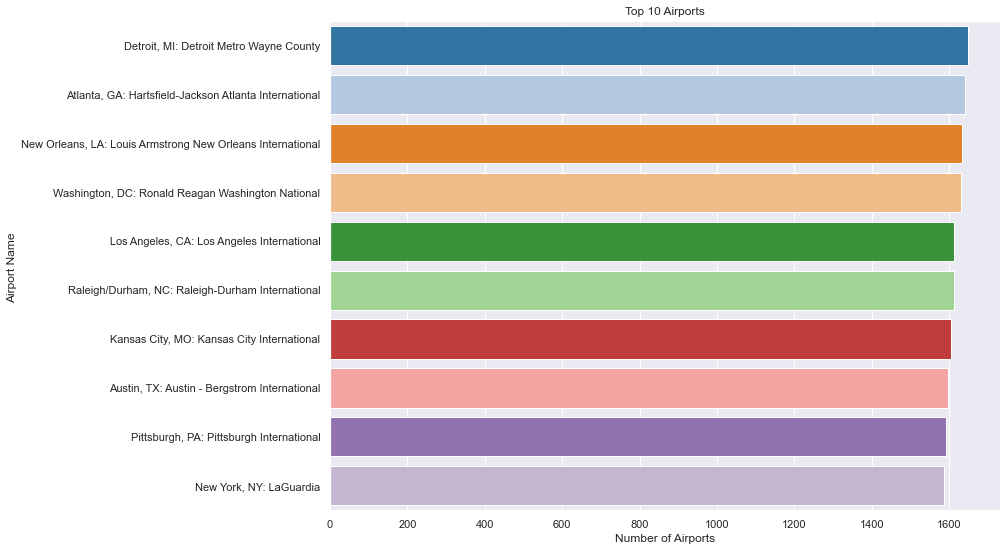

In [57]:
#visulaization of top 10 airport in dataset
sb.countplot(y='airport_name', palette="tab20", data=delays,order=delays.airport_name.value_counts().iloc[:10].index);
plt.title('Top 10 Airports')
plt.xlabel('Number of Airports')
plt.ylabel('Airport Name ');

<b> We can see that the most airport that we have information about id Detroit Metro Wayne Country Airport.

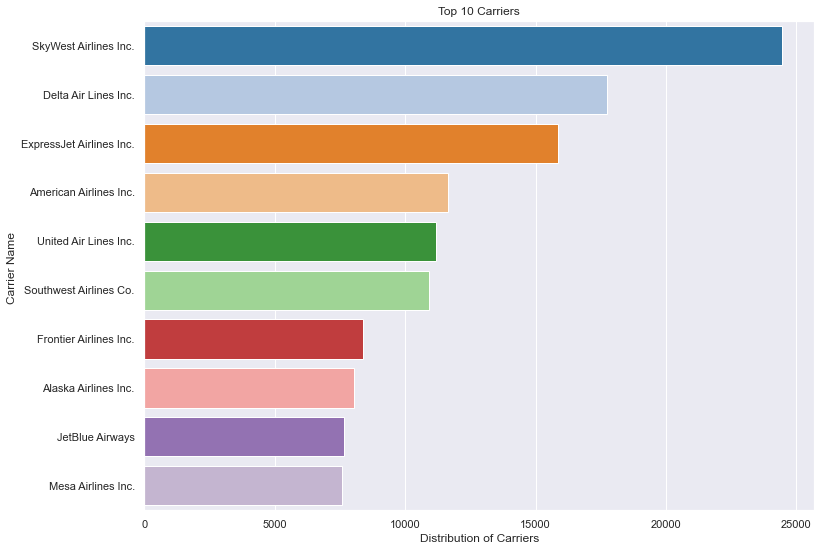

In [58]:
#visulaization of top 10 carriers' repeated names with delays in dataset
sb.countplot(y='carrier_name', palette="tab20", data=delays,order=delays.carrier_name.value_counts().iloc[:10].index);
plt.title('Top 10 Carriers')
plt.xlabel('Distribution of Carriers')
plt.ylabel('Carrier Name ');

<b> With pervious visualization we can see that the most repeated corporation with delayed flights is SkyWest Airlines Incorporation.

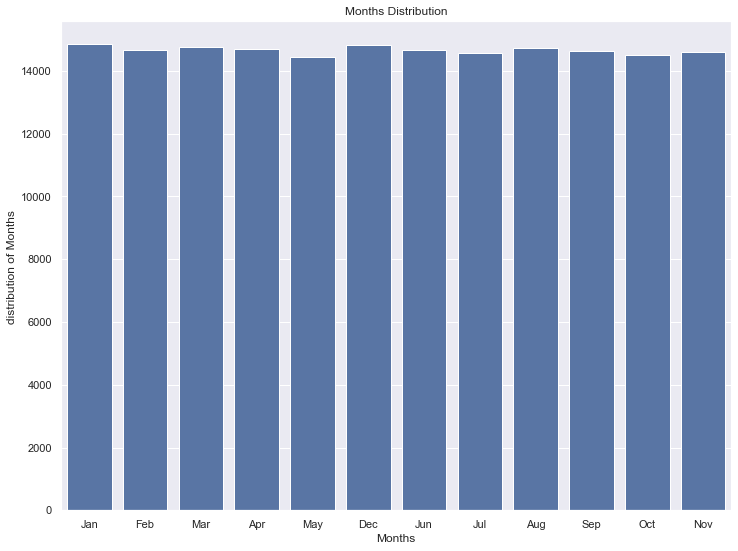

In [59]:
#visulaization of ditribution per month
delays['month']=pd.to_datetime(delays['month'], format='%m').dt.month_name().str.slice(stop=3)
sb.set(rc={'figure.figsize':(12,9)})
base_color = sb.color_palette()[0]
sb.countplot(x='month', color=base_color, data=delays);
plt.title('Months Distribution')
plt.xlabel('Months')
plt.ylabel('distribution of Months ');

<b> More over we can say that the most month repeated with arriving flights is december mainly because people perfer to travel during the holidays. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

suprisingly the year of 2020 had quit large information in despite of all the airlines flights deliation and cancelation due to the quarantine in march and lasted few months later.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

during investigation I needed to transform months names from  varibale form to its names form so it could be more clear in the exploration.

## Bivariate Exploration



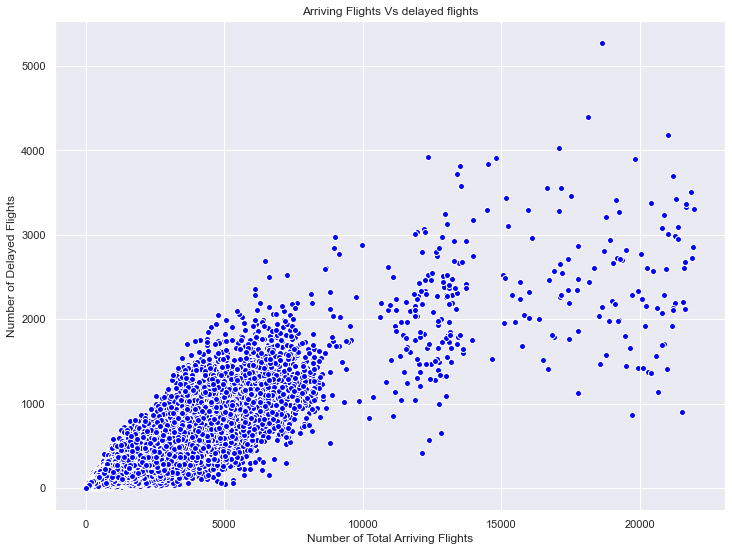

In [60]:
plt.scatter(data = delays, x = 'arr_flights', y = 'arr_del15',color = 'blue', edgecolors = 'white');
plt.title('Arriving Flights Vs delayed flights')
plt.xlabel('Number of Total Arriving Flights')
plt.ylabel('Number of Delayed Flights');

<b>We can see above there is a positive correlation between the number of delayed flights of every airport and the total number of arriving flights.

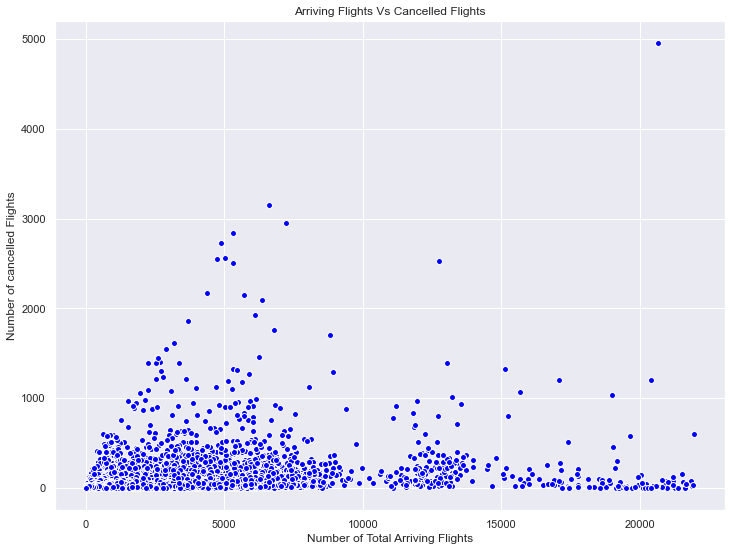

In [61]:
plt.scatter(data = delays, x = 'arr_flights', y = 'arr_cancelled',color = 'blue', edgecolors = 'white');
plt.title('Arriving Flights Vs Cancelled Flights')
plt.xlabel('Number of Total Arriving Flights')
plt.ylabel('Number of cancelled Flights');

<b>In general, We can notice above that the number of cancelled flights is low in comparison with the total of arriving flights but theirs some outliers.

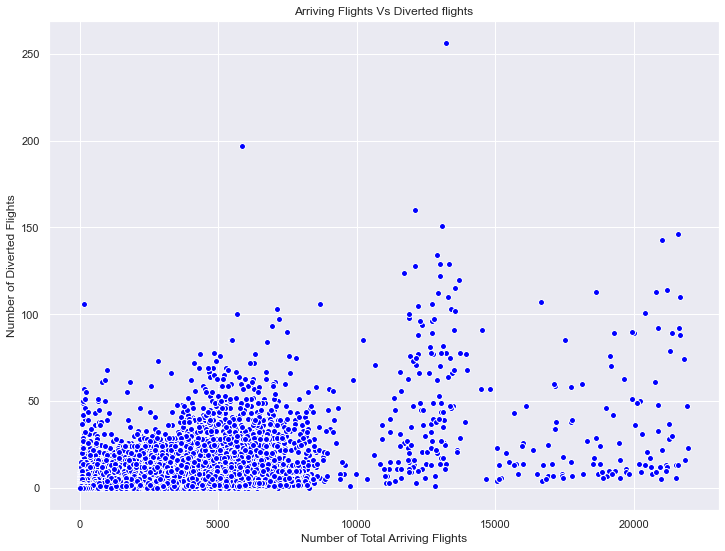

In [62]:
plt.scatter(data = delays, x = 'arr_flights', y = 'arr_diverted',color = 'blue', edgecolors = 'white');
plt.title('Arriving Flights Vs Diverted flights')
plt.xlabel('Number of Total Arriving Flights')
plt.ylabel('Number of Diverted Flights');

<b>Most of number of diverted flights falls in the range from zero to hundred Vs the total number of arriving flights.

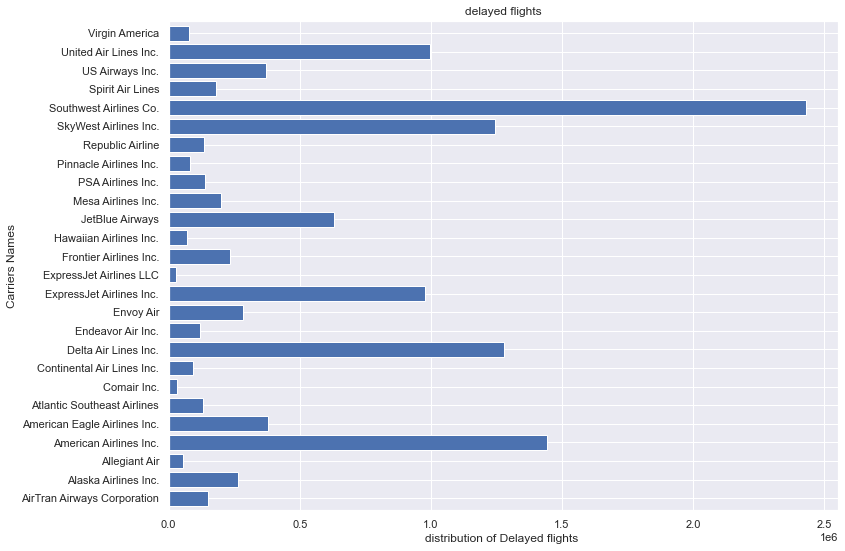

In [63]:
#visualization of total delayed flights for every carrier name.
total_delays=delays.groupby('carrier_name')['arr_del15'].sum()
total_delays.plot.barh(width=0.8)
plt.title('delayed flights')
plt.ylabel('Carriers Names')
plt.xlabel('distribution of Delayed flights ');

<b> As we can notice above the carrier corporation with the most number of delayed flights (with more that 15 minutes delay) is SouthWest Airlines Corporation.

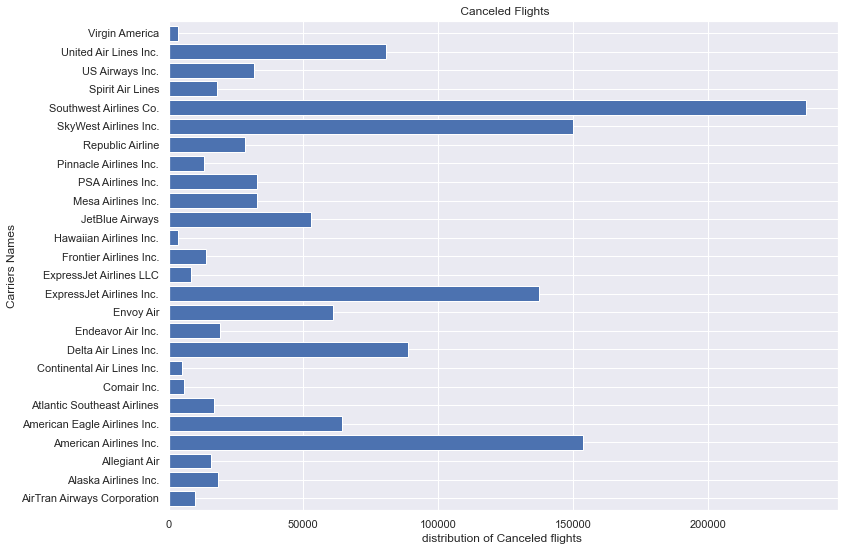

In [64]:
#visualization of total cancelled flights for every carrier name.
total_can=delays.groupby('carrier_name')['arr_cancelled'].sum()
total_can.plot.barh(width=0.8)
plt.title(' Canceled Flights')
plt.ylabel('Carriers Names')
plt.xlabel('distribution of Canceled flights ');

<b> We can see that carrier corporation with the most number of canceled flights is SouthWest Airlines Corporation.

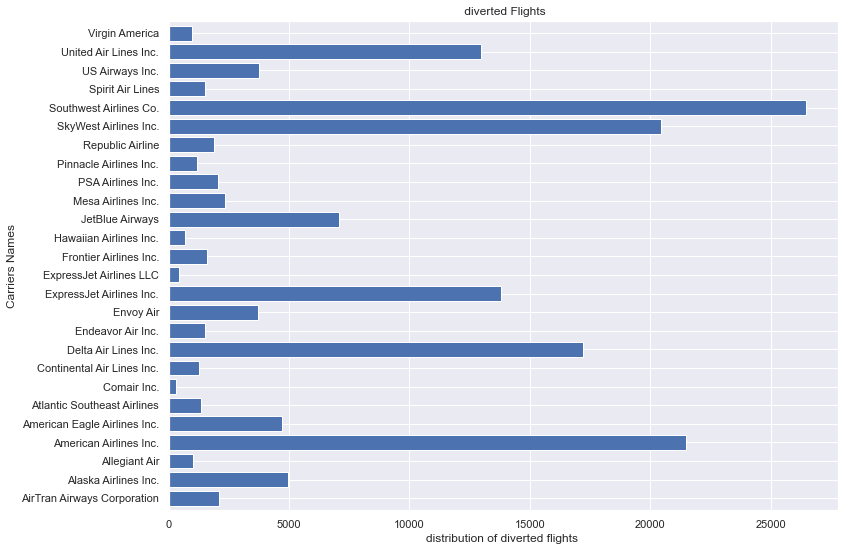

In [65]:
#visualization of total diverted flights for every carrier name.
total_div=delays.groupby('carrier_name')['arr_diverted'].sum()
total_div.plot.barh(width=0.8)
plt.title(' diverted Flights')
plt.ylabel('Carriers Names')
plt.xlabel('distribution of diverted flights ');

<b> Obviously, we can notice that carrier corporation with the most number of diverted flights is SouthWest Airlines Corporation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I observed that there is a positive correlation between the total number of flights and  the total number of delayed flights. Which is a normal excepected relationship.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I can't help but notice that SouthWest Airlines Corporation has the most no of delayed flights which let me think wgy they have that large number of delayed flights, mostly becaues they have a serious problem and they need to solve it as fast as possible.

## Multivariate Exploration


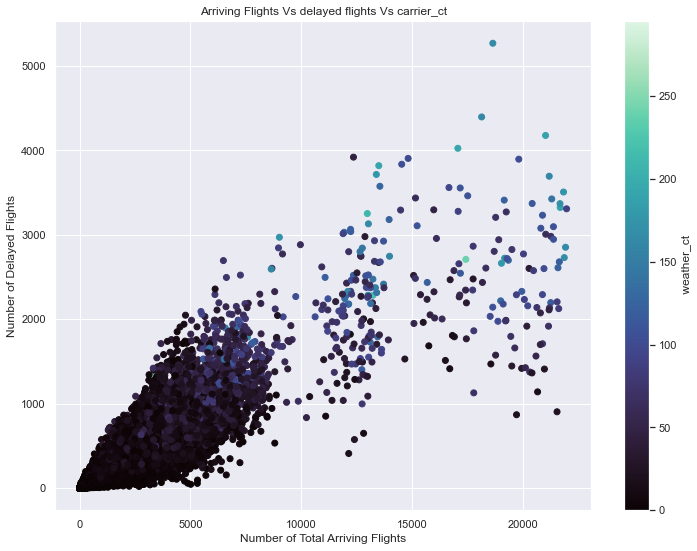

In [66]:
plt.scatter(data = delays, x = 'arr_flights', y = 'arr_del15', c= 'weather_ct',cmap='mako');
plt.colorbar(label=' weather_ct')
plt.title('Arriving Flights Vs delayed flights Vs carrier_ct')
plt.xlabel('Number of Total Arriving Flights')
plt.ylabel('Number of Delayed Flights');

<b>As we can notice above the weather doesn't have a great impact on the number of the total arriving flights and the nuber of delayed flights.

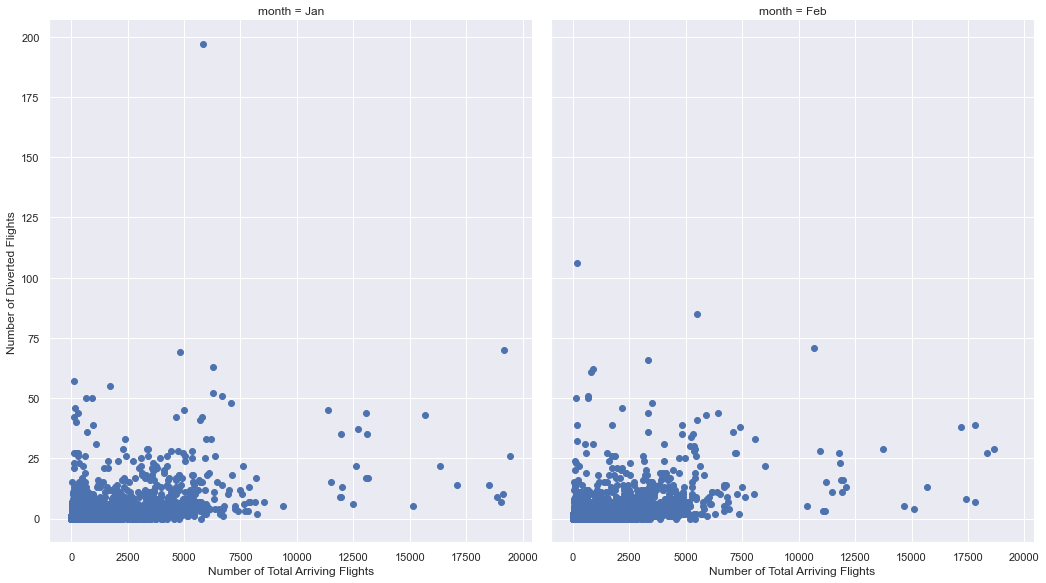

In [67]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["Jan", "Feb"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

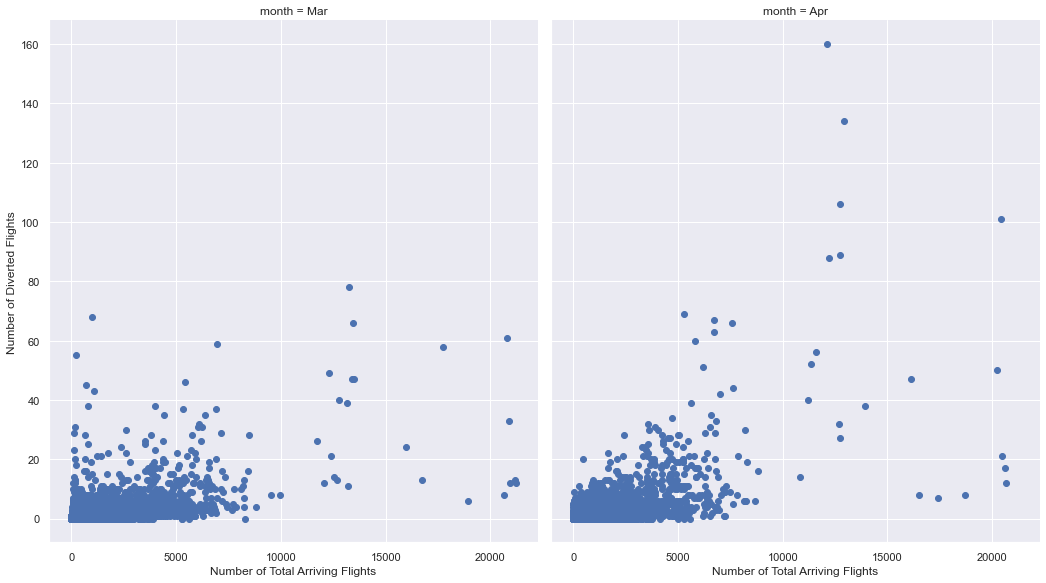

In [68]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["Mar", "Apr"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

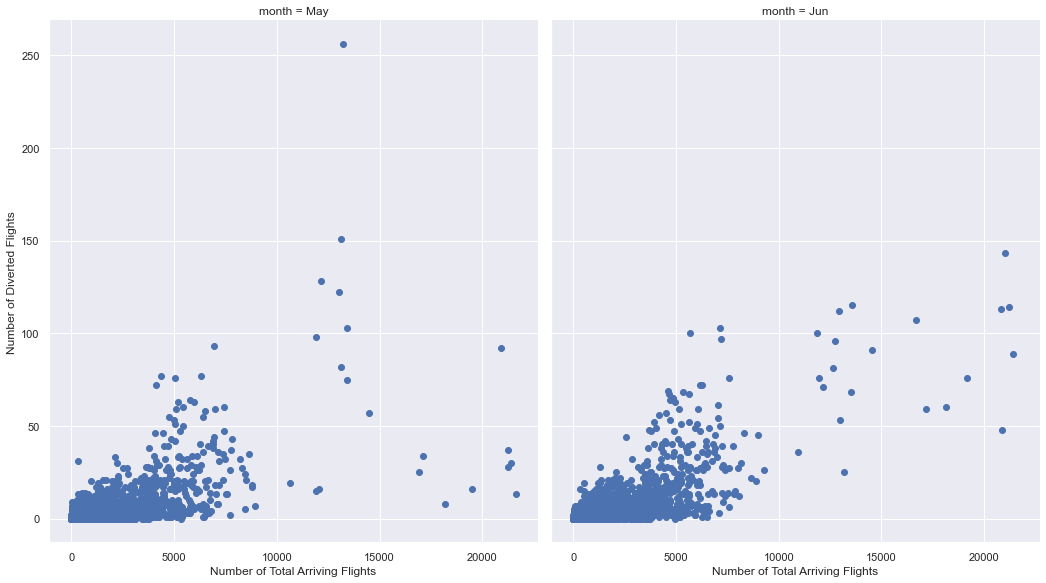

In [69]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["May", "Jun"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

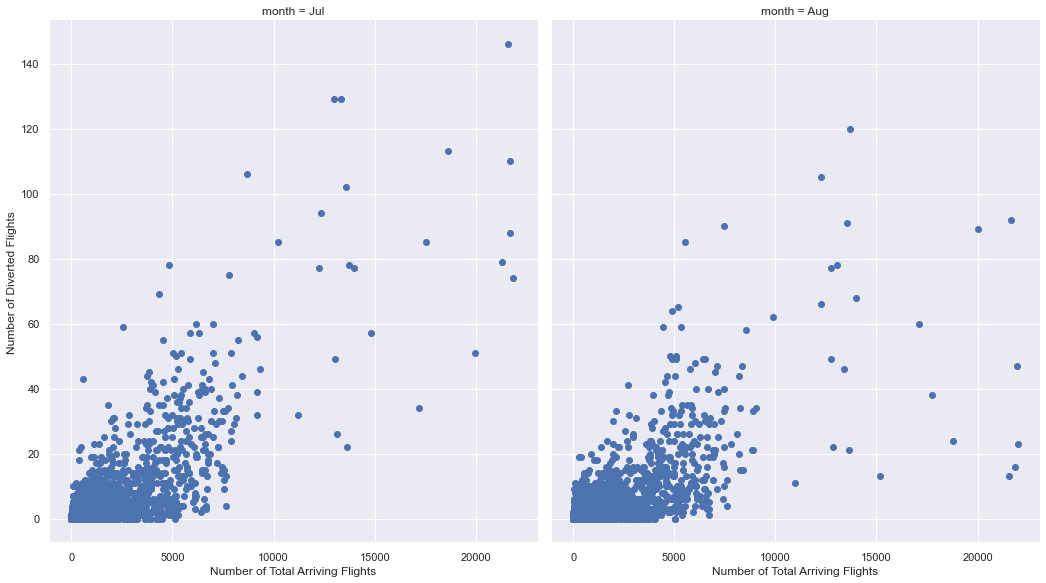

In [70]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["Jul", "Aug"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

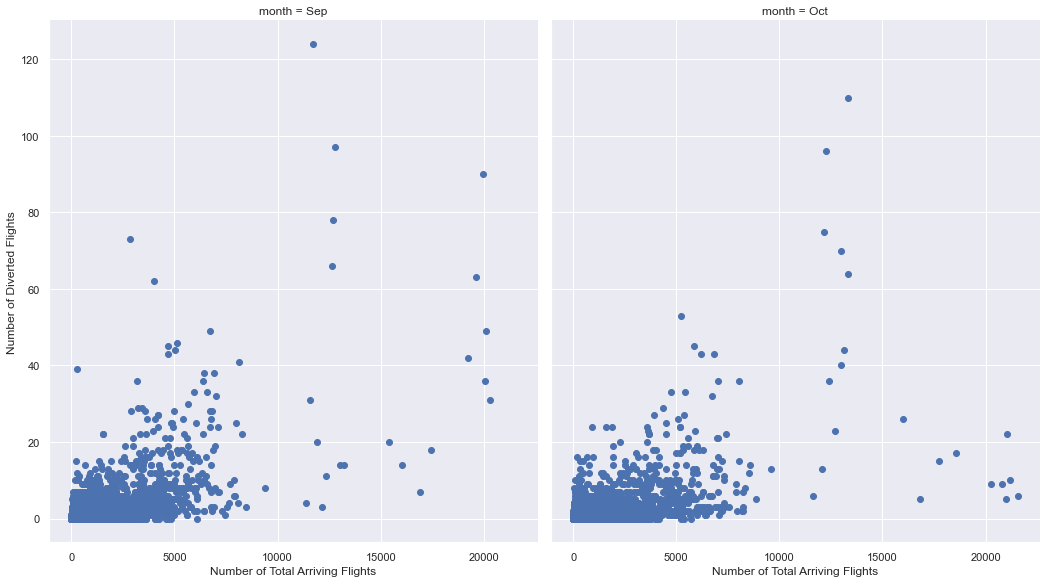

In [71]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["Sep", "Oct"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

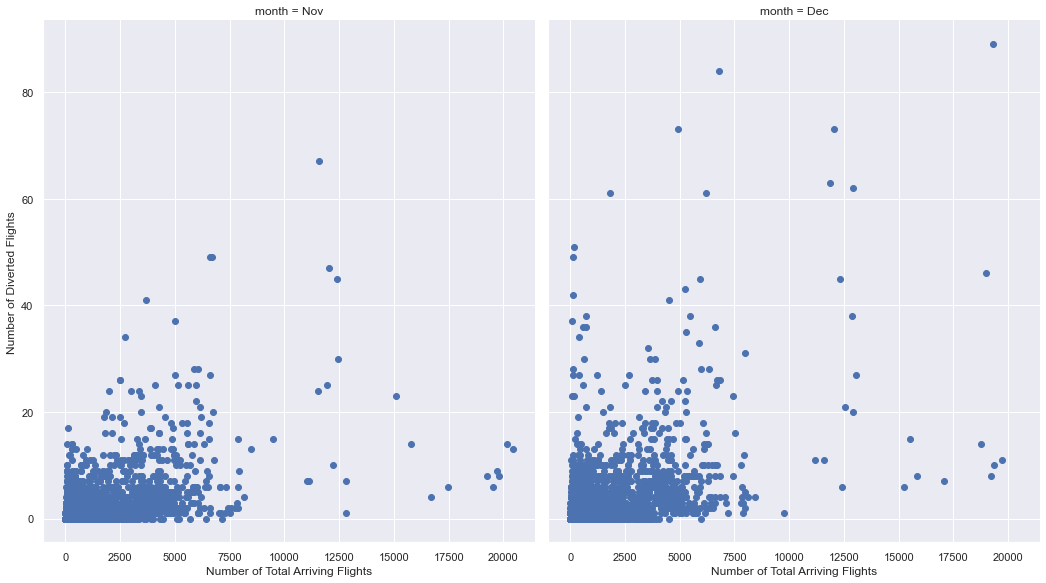

In [72]:
g= sb.FacetGrid(data=delays,col='month',height = 8.27/1,  aspect = (14.70/2)/(8.27/1),col_order=["Nov", "Dec"])
g.map(plt.scatter, 'arr_flights','arr_diverted' )
g.set_axis_labels("Number of Total Arriving Flights", "Number of Diverted Flights");

<b>We can see that there are almost small numbers of diverted flights every month in comparison with the great numbers of diverted flights.

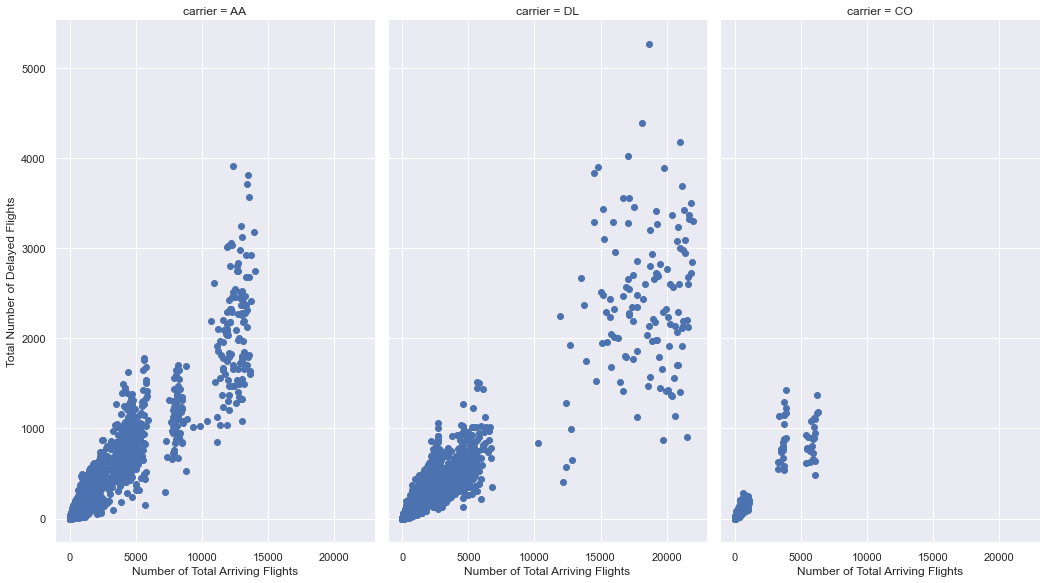

In [73]:
g= sb.FacetGrid(data=delays,col='carrier',height = 8.27/1,  aspect = (14.70/3)/(8.27/1),col_order=["AA", "DL","CO"])
g.map(plt.scatter, 'arr_flights','arr_del15' )
g.set_axis_labels("Number of Total Arriving Flights", "Total Number of Delayed Flights");

<b>Our observation is the carriers with the greatest number of delayed flights in comparison with the total number of arriving flights  are (AA and DL).